In [135]:
import jieba 
from PIL import Image
import numpy as np 
from wordcloud import * 
import re 
import matplotlib.pyplot as plt
import collections

In [136]:
# 规范输入
fn = open('后来.txt', 'r', encoding='utf-8')
string_data = fn.read()
seg_list_exact = jieba.cut(string_data, cut_all = False) # 精确模式分词
object_list = []
remove_words = ['\n', ',', ':', u'的', u'，',u'和', u'是', u'随着', u'对于',u'对',u'等',u'能',u'都',u'。',
u' ',u'、',u'中',u'在',u'了',u'通常',u'如果',u'我们',u'需要'] # 自定义去除词库

for word in seg_list_exact: # 循环读出每个分词
    if word not in remove_words: # 如果不在去除词库中
        object_list.append(word) # 分词追加到列表

# 词频统计
word_counts = collections.Counter(object_list) # 对分词做词频统计
word_counts = dict(word_counts) # wordcloud 输入为dict  {'词':'次数'}

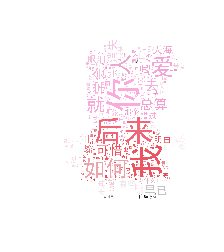

In [139]:
# 设定参数
input_img = 'pig.jpeg'
output_img = 'output.jpg'
font_path = './Fonts/simhei.ttf'
background_color = 'white'
repeat = True
max_words = 300

# 绘制词云
maskover = np.array(Image.open(input_img))
img_color = ImageColorGenerator(maskover)
w = WordCloud(width=400, height=200, scale=4, background_color=background_color, 
              max_words=max_words, prefer_horizontal=0.1,mask=maskover, max_font_size=100,
              repeat=repeat,font_path=font_path).generate_from_frequencies(word_counts)
plt.imshow(w)
plt.imshow(w.recolor(color_func=img_color))
plt.axis('off')
plt.show()
w.to_file(output_img)



In [134]:
# help
"""
font_path : string  #字体路径，需要展现什么字体就把该字体路径+后缀名写上，如：font_path = '黑体.ttf'

width : int (default=400) #输出的画布宽度，默认为400像素

height : int (default=200) #输出的画布高度，默认为200像素

prefer_horizontal : float (default=0.90) #词语水平方向排版出现的频率，默认 0.9 （所以词语垂直方向排版出现频率为 0.1 ）

mask : nd-array or None (default=None) #如果参数为空，则使用二维遮罩绘制词云。如果 mask 非空，设置的宽高值将被忽略，遮罩形状被 mask 取代。除全白（#FFFFFF）的部分将不会绘制，其余部分会用于绘制词云。如：bg_pic = imread('读取一张图片.png')，背景图片的画布一定要设置为白色（#FFFFFF），然后显示的形状为不是白色的其他颜色。可以用ps工具将自己要显示的形状复制到一个纯白色的画布上再保存，就ok了。

scale : float (default=1) #按照比例进行放大画布，如设置为1.5，则长和宽都是原来画布的1.5倍

min_font_size : int (default=4) #显示的最小的字体大小

font_step : int (default=1) #字体步长，如果步长大于1，会加快运算但是可能导致结果出现较大的误差

max_words : number (default=200) #要显示的词的最大个数

stopwords : set of strings or None #设置需要屏蔽的词，如果为空，则使用内置的STOPWORDS

background_color : color value (default=”black”) #背景颜色，如background_color='white',背景颜色为白色

max_font_size : int or None (default=None) #显示的最大的字体大小

mode : string (default=”RGB”) #当参数为“RGBA”并且background_color不为空时，背景为透明

relative_scaling : float (default=.5) #词频和字体大小的关联性

color_func : callable, default=None #生成新颜色的函数，如果为空，则使用 self.color_func

regexp : string or None (optional) #使用正则表达式分隔输入的文本

collocations : bool, default=True #是否包括两个词的搭配

colormap : string or matplotlib colormap, default=”viridis” #给每个单词随机分配颜色，若指定color_func，则忽略该方法

random_state : int or None  #为每个单词返回一个PIL颜色


fit_words(frequencies)  #根据词频生成词云
generate(text)  #根据文本生成词云
generate_from_frequencies(frequencies[, ...])   #根据词频生成词云
generate_from_text(text)    #根据文本生成词云
process_text(text)  #将长文本分词并去除屏蔽词（此处指英语，中文分词还是需要自己用别的库先行实现，使用上面的 fit_words(frequencies) ）
recolor([random_state, color_func, colormap])   #对现有输出重新着色。重新上色会比重新生成整个词云快很多
to_array()  #转化为 numpy array
to_file(filename)   #输出到文件
"""
1

1